In [1]:
# import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# bet of hands
BET_BANKER = "banker"
BET_PLAYER = "player"
BET_TIE = "tie"

# probability occurance of bet of hands
probability_banker = 45
probability_player = 45
probability_tie = 10
# payout ratio
win_payout = 1
tie_payout = 8
# 5% commission for the house
win_commission = 0.05
# each player's initial balance
initial_balance = 10000000

FIG_WIDTH = 16
FIG_HEIGHT = 10

'''
Two players bet on banker and player respectively with different amount
* 2 players play baccarat
* player 1 bet on banker with excessive amount more than player 2
* player 2 bet on player with way less amount
* the probability settings defined in cell "configuration settings"
* this test aims to evaluate the long term result after many rounds (>1000) of playing
'''


'\nTwo players bet on banker and player respectively with different amount\n* 2 players play baccarat\n* player 1 bet on banker with excessive amount more than player 2\n* player 2 bet on player with way less amount\n* the probability settings defined in cell "configuration settings"\n* this test aims to evaluate the long term result after many rounds (>1000) of playing\n'

In [2]:
class Player:
    def __init__(self, name, balance):
        self.name = name
        self.initial_amount = balance
        self.balance = balance
        self.bet = ""
        self.bet_amount = 0
    def place_bet(self, bet, amount):
        self.bet_hand = bet
        self.bet_amount = amount
    def pay_collect(self, result):
        win_loss = 0
        if self.bet_hand == "":
            # player did not bet, no win nor lose
            pass
        elif result == self.bet_hand:
            # player's bet win
            payout = 0
            if result == BET_BANKER:
                payout = win_payout
            elif result == BET_PLAYER:
                payout = win_payout
            elif result == BET_TIE:
                payout = tie_payout
            win = payout * self.bet_amount
            win_loss = win * (1 - win_commission)
        else:
            # player's bet losed
            payout = 0
            if result == BET_BANKER:
                payout = win_payout
            elif result == BET_PLAYER:
                payout = win_payout
            else:
                payout = 0
            win_loss = -1 * payout * self.bet_amount
        self.balance += win_loss
        return win_loss

class Baccarat:
    def __init__(self, player, probability_banker, probability_player, probability_tie):
        self.player = player
        self.probability_banker = probability_banker
        self.probability_player = probability_player
        self.probability_tie = probability_tie
        self.balance = 0
        self.bet_record = []
        self.record_index = 0
    def deal(self):
        num_random = random.randrange(0, 100)
        if num_random < self.probability_banker:
            result = BET_BANKER
        elif num_random < (self.probability_banker + self.probability_player):
            result = BET_PLAYER
        else:
            result = BET_TIE
        return result
    def conclude(self, result):
        profitloss = 0
        for i in player:
            win_loss = player[i].pay_collect(result)
            self.bet_record.append({"match": self.record_index, "result": result, "player": player[i].name, "winloss": win_loss})
            profitloss -= win_loss
        self.balance += profitloss
        self.bet_record.append({"match": self.record_index, "result": result, "player": "house", "winloss": profitloss})
        self.record_index += 1
    def print(self):
        print("result player winloss")
        for record in self.bet_record:
            print("{0} {1} {2}".format(record['result'], record['player'], record['winloss']))
    def df(self):
        df = pd.DataFrame.from_dict(self.bet_record)
        return df

def show_result(bet_record_df):
    # plot balanace
    display(HTML('<h3>All players cumulative balance</h3>'))
    df_winloss = bet_record_df[['match', 'player', 'winloss']]
    df = df_winloss.pivot(index=['match'], columns=['player'], values=['winloss'])
    df_cumsum_all = df.cumsum()
    df_cumsum_all.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    plt.show()
    # display(HTML('<h3>House cumulative balance</h3>'))
    # df_cumsum_1 = df_cumsum_all['winloss']['house']
    # df_cumsum_1.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
    # plt.show()

    # show statistic
    display(HTML('<h3>Game result statistic</h3>'))
    display(HTML('<h4>Number of matches played</h4>'))
    player_group = bet_record_df.groupby('player')
    num_matches = player_group.get_group('house')['match'].count()
    print(num_matches)
    display(HTML('<h4>Percentage occurence of different result</h4>'))
    print(player_group.get_group('house').value_counts(['result'], normalize=True))
    display(HTML('<h4>Win-Loss after final match</h4>'))
    print(df_cumsum_all['winloss'].iloc[[-1]])
    display(HTML('<h4>Max draw-down</h4>'))
    print(df_cumsum_all['winloss'].min())


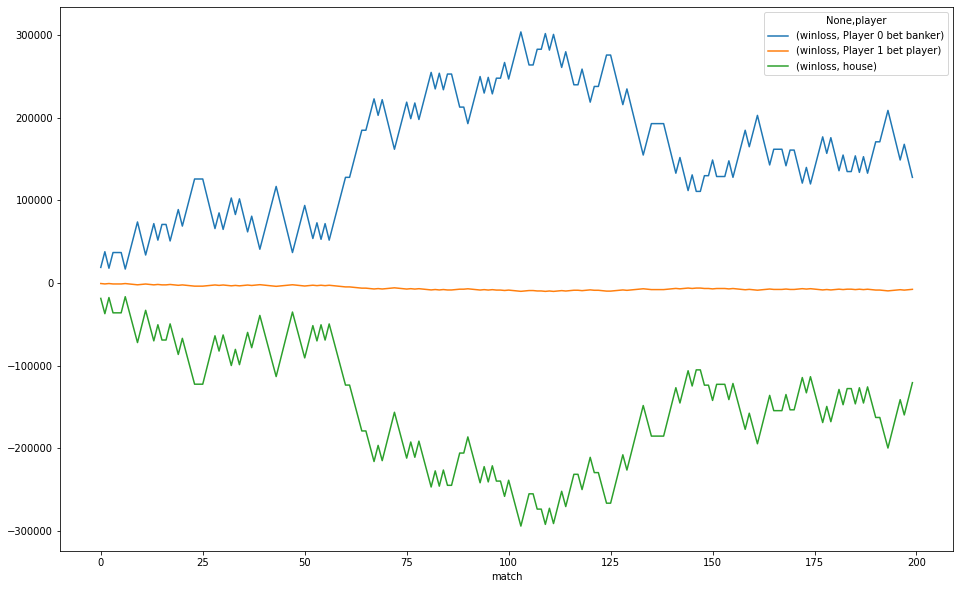

200


result
banker    0.460
player    0.405
tie       0.135
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199                128000.0              -7525.0 -120475.0


player
Player 0 bet banker     17000.0
Player 1 bet player    -10025.0
house                 -294050.0
dtype: float64


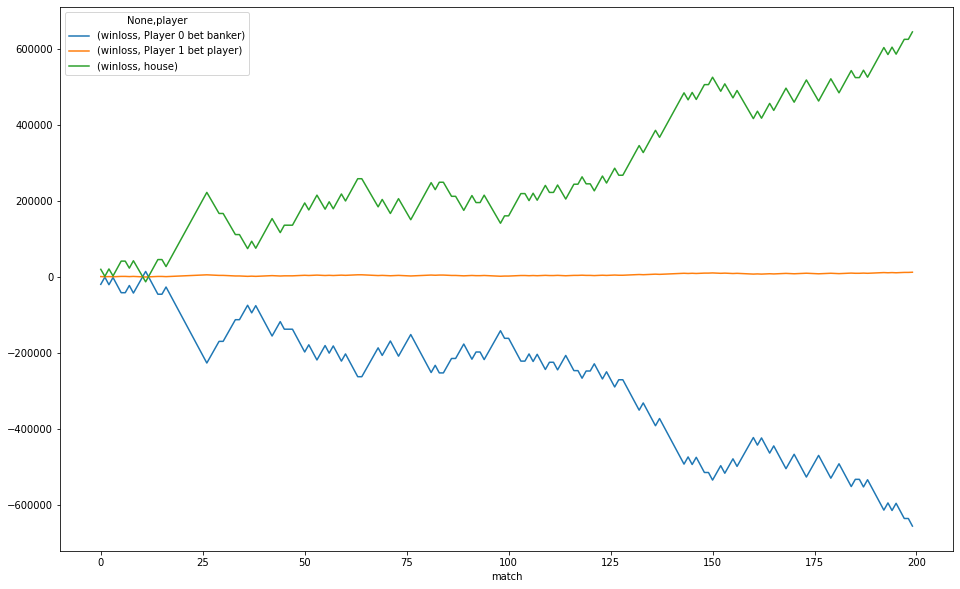

200


result
player    0.525
banker    0.380
tie       0.095
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -656000.0              11875.0  644125.0


player
Player 0 bet banker   -656000.0
Player 1 bet player      -625.0
house                  -13375.0
dtype: float64


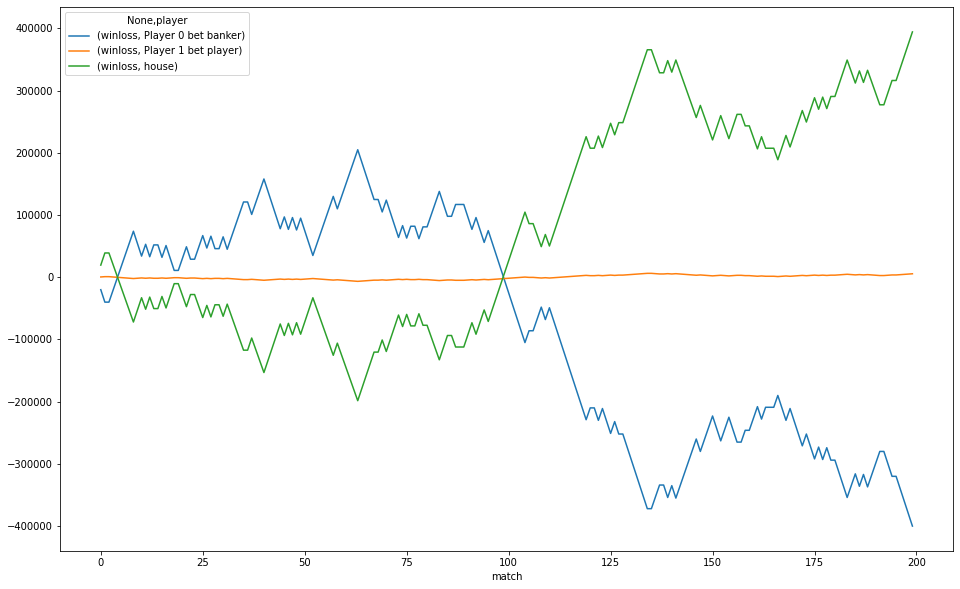

200


result
player    0.48
banker    0.40
tie       0.12
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -400000.0               5600.0  394400.0


player
Player 0 bet banker   -400000.0
Player 1 bet player     -6575.0
house                 -198425.0
dtype: float64


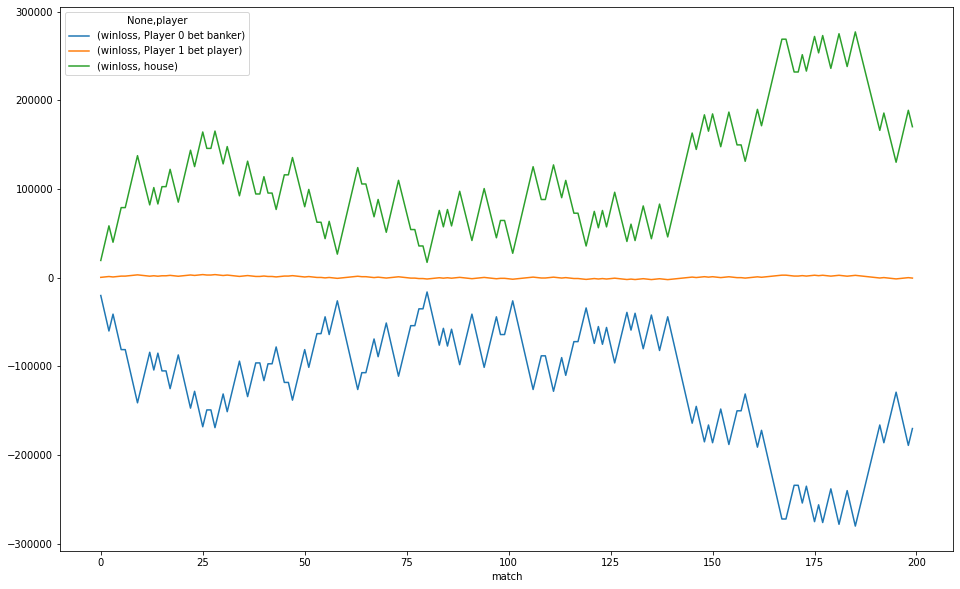

200


result
player    0.47
banker    0.45
tie       0.08
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -170000.0               -350.0  170350.0


player
Player 0 bet banker   -280000.0
Player 1 bet player     -2075.0
house                   17375.0
dtype: float64


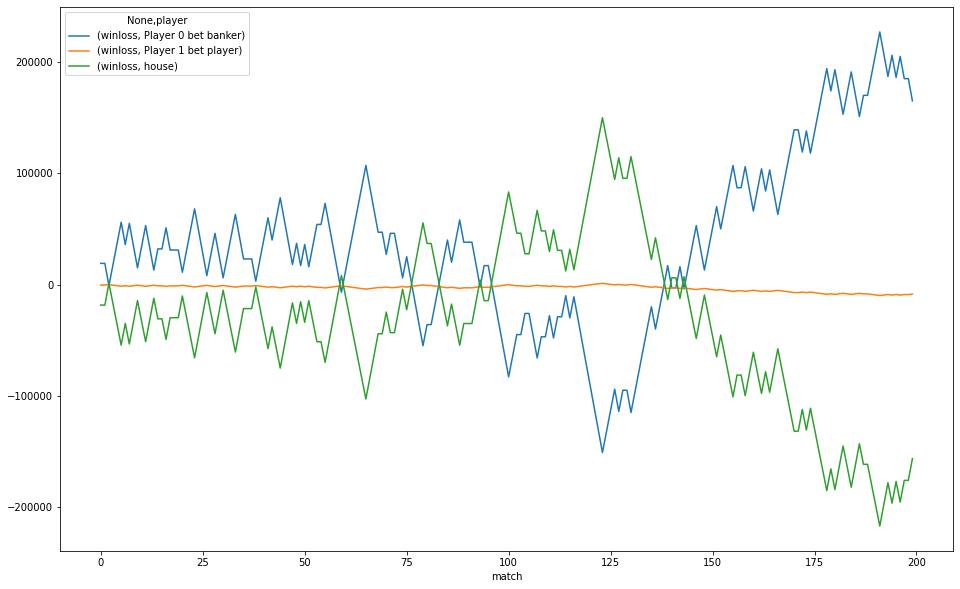

200


result
banker    0.475
player    0.410
tie       0.115
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199                165000.0              -8550.0 -156450.0


player
Player 0 bet banker   -151000.0
Player 1 bet player     -9925.0
house                 -217075.0
dtype: float64


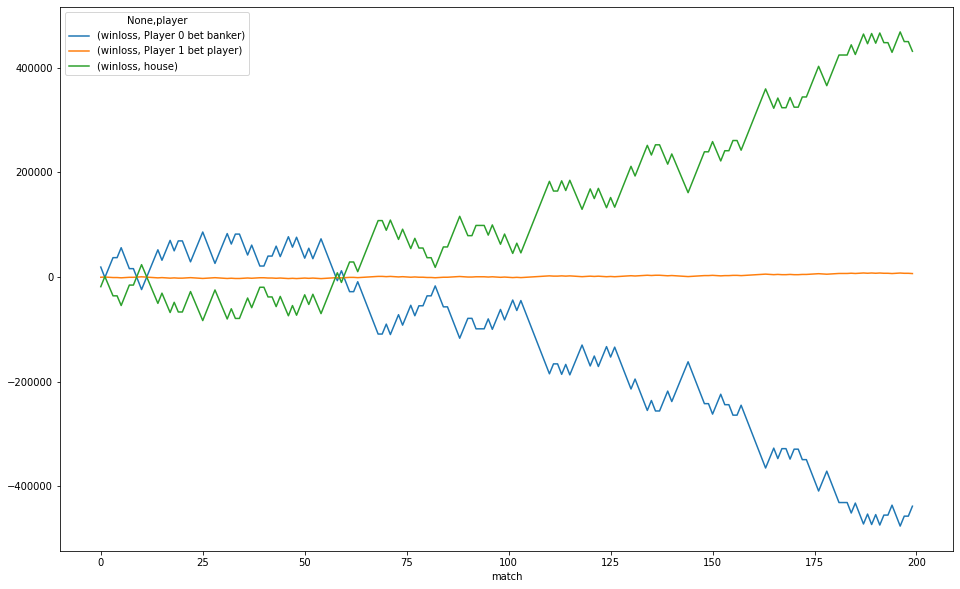

200


result
player    0.48
banker    0.39
tie       0.13
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -438000.0               6600.0  431400.0


player
Player 0 bet banker   -476000.0
Player 1 bet player     -3050.0
house                  -83275.0
dtype: float64


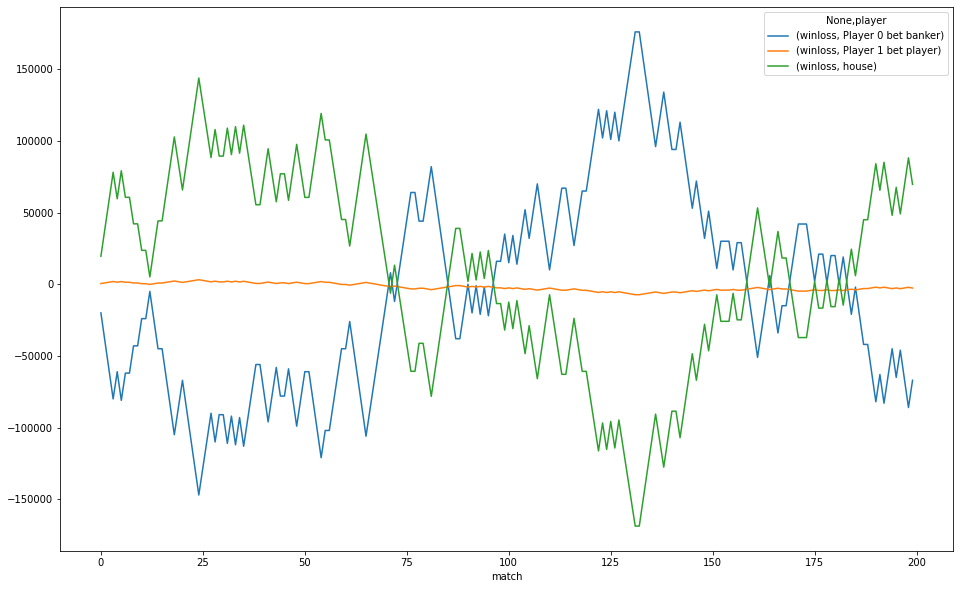

200


result
banker    0.435
player    0.430
tie       0.135
dtype: float64


player  Player 0 bet banker  Player 1 bet player    house
match                                                    
199                -67000.0              -2650.0  69650.0


player
Player 0 bet banker   -147000.0
Player 1 bet player     -7300.0
house                 -168700.0
dtype: float64


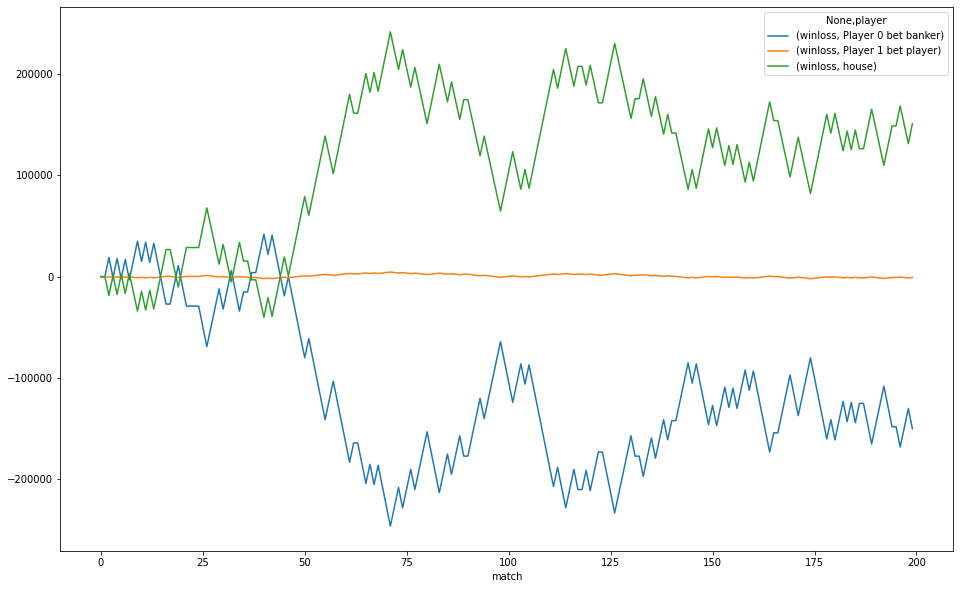

200


result
player    0.465
banker    0.450
tie       0.085
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -150000.0               -825.0  150825.0


player
Player 0 bet banker   -246000.0
Player 1 bet player     -2000.0
house                  -40125.0
dtype: float64


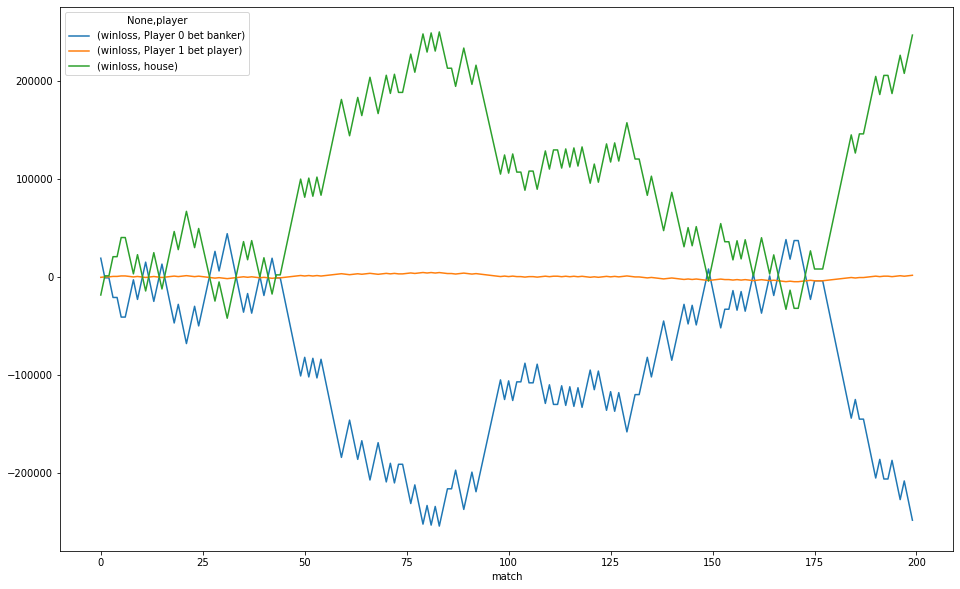

200


result
player    0.48
banker    0.44
tie       0.08
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -248000.0               1600.0  246400.0


player
Player 0 bet banker   -254000.0
Player 1 bet player     -4925.0
house                  -42175.0
dtype: float64


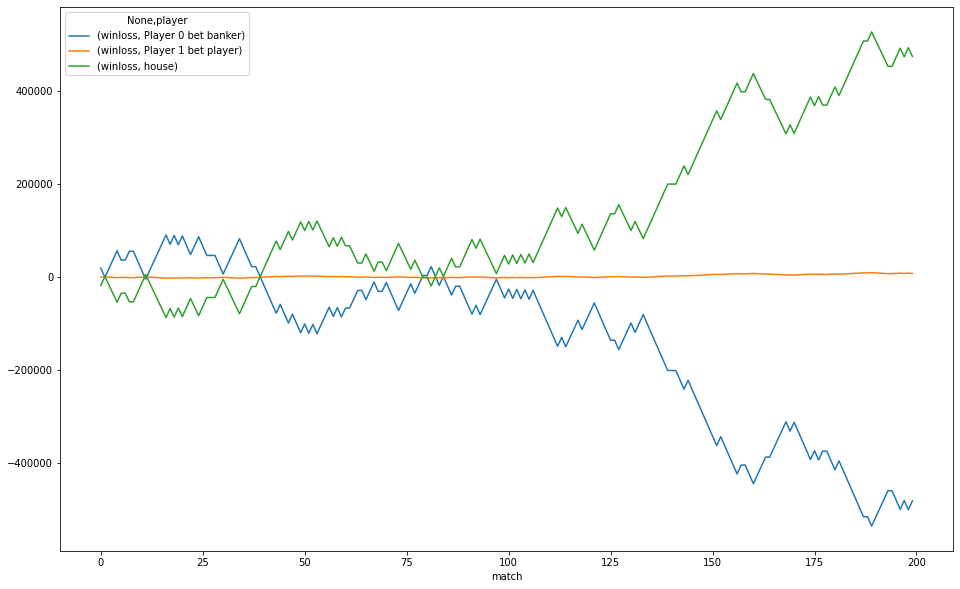

200


result
player    0.505
banker    0.405
tie       0.090
dtype: float64


player  Player 0 bet banker  Player 1 bet player     house
match                                                     
199               -481000.0               7475.0  473525.0


player
Player 0 bet banker   -535000.0
Player 1 bet player     -2825.0
house                  -87375.0
dtype: float64


In [3]:
# Test case 1
# * define 2 players and their bet hand and amount
# * each player's bet amount is largely different (e.g. one 500, one 20,000)
# Conclusion
# * win-loss seems random
num_test = 10
num_matches = 200
bets = [
    {'bet': BET_BANKER, 'amount': 20000},
    {'bet': BET_PLAYER, 'amount': 500},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 1 - Two player different bet amount comparison:</h1>'))
for imatch, num_matches in enumerate(test_matches):
    display(HTML('<h2>Match [{0}]:</h2>'.format(imatch)))
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    bet_record_df = baccarat.df()
    show_result(bet_record_df)


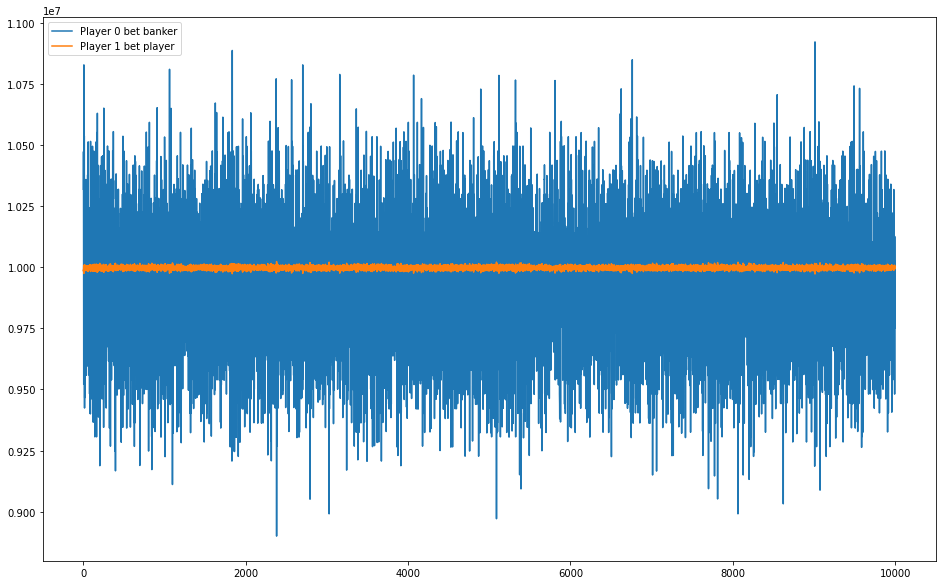

Player 0 bet banker  Player 1 bet player
count         1.000000e+04         1.000000e+04
mean          9.915434e+06         9.997612e+06
std           2.655174e+05         6.637745e+03
min           8.900000e+06         9.972350e+06
25%           9.735000e+06         9.992950e+06
50%           9.911000e+06         9.997725e+06
75%           1.010200e+07         1.000212e+07
max           1.092200e+07         1.002320e+07

In [4]:
# Test case 2
# * define 2 players and their bet hand and amount
# * each player's bet amount is largely different (e.g. one 500, one 20,000)
# * increase the sample to very large to see if there is any pattern
num_test = 10 * 1000
num_matches = 200
bets = [
    {'bet': BET_BANKER, 'amount': 20000},
    {'bet': BET_PLAYER, 'amount': 500},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 2 - Two player different bet amount large samples:</h1>'))
playerWinLoss = []
for imatch, num_matches in enumerate(test_matches):
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    test_result = {}
    for i in player:
        test_result[player[i].name] = player[i].balance
    playerWinLoss.append(test_result)
df = pd.DataFrame.from_dict(playerWinLoss)
df.plot(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.show()
df.describe()


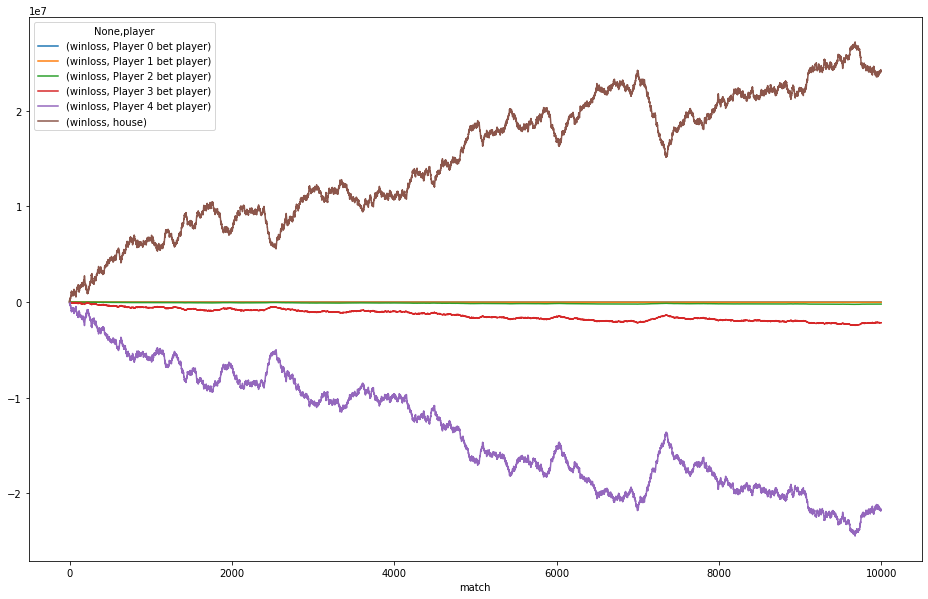

10000


result
player    0.4498
banker    0.4490
tie       0.1012
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2169.0             -21690.0            -216900.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2169000.0          -21690000.0  24099759.0  


player
Player 0 bet player       -2448.5
Player 1 bet player      -24485.0
Player 2 bet player     -244850.0
Player 3 bet player    -2448500.0
Player 4 bet player   -24485000.0
house                     11111.0
dtype: float64


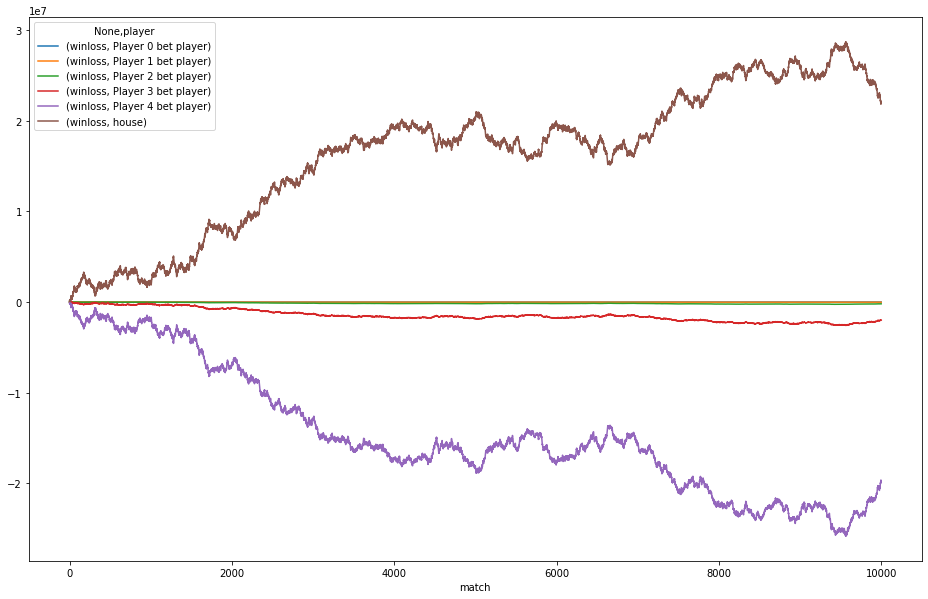

10000


result
player    0.4530
banker    0.4502
tie       0.0968
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1985.0             -19850.0            -198500.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1985000.0          -19850000.0  22055335.0  


player
Player 0 bet player       -2580.0
Player 1 bet player      -25800.0
Player 2 bet player     -258000.0
Player 3 bet player    -2580000.0
Player 4 bet player   -25800000.0
house                     22222.0
dtype: float64


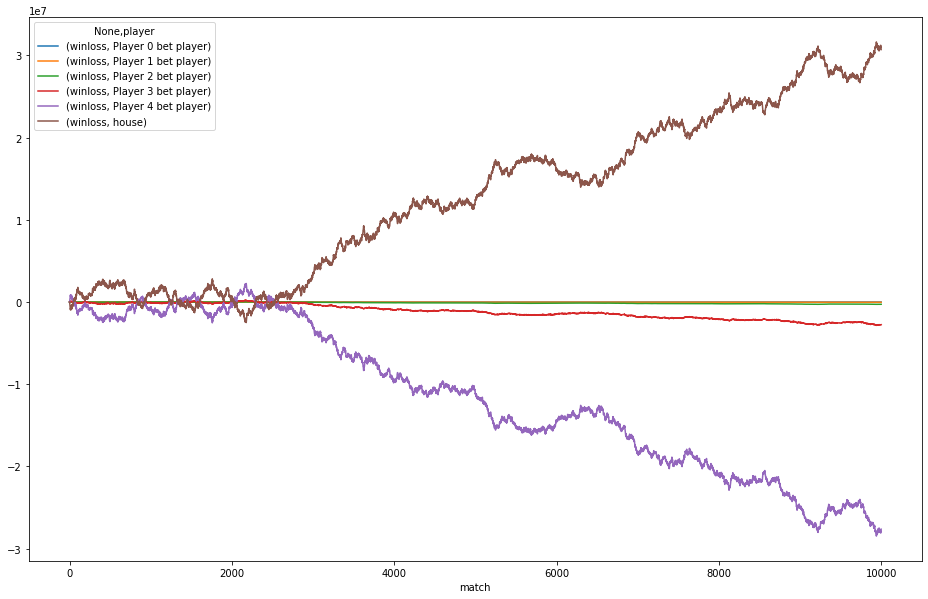

10000


result
banker    0.4537
player    0.4485
tie       0.0978
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2762.5             -27625.0            -276250.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2762500.0          -27625000.0  30694137.5  


player
Player 0 bet player       -2846.5
Player 1 bet player      -28465.0
Player 2 bet player     -284650.0
Player 3 bet player    -2846500.0
Player 4 bet player   -28465000.0
house                  -2499975.0
dtype: float64


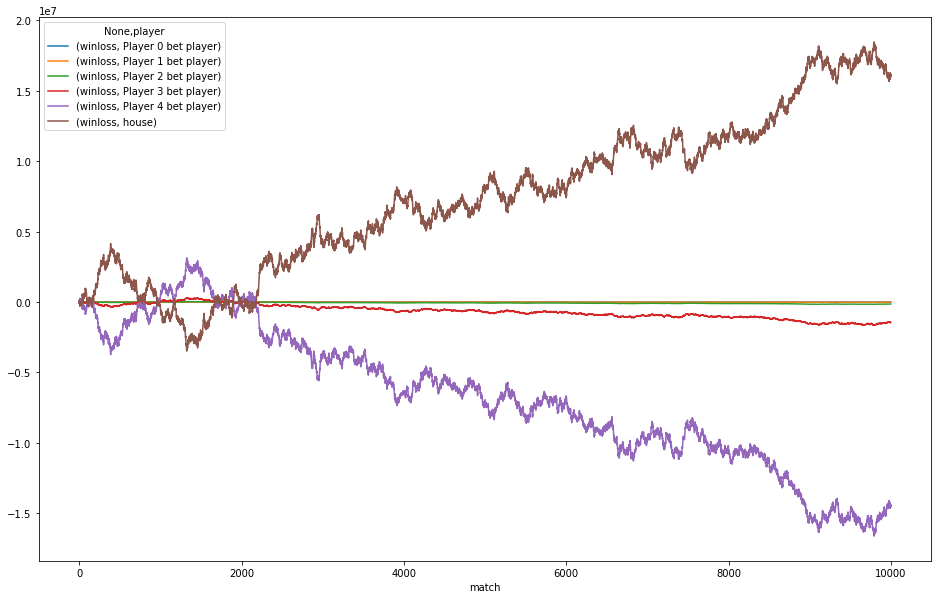

10000


result
player    0.4553
banker    0.4470
tie       0.0977
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1446.5             -14465.0            -144650.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1446500.0          -14465000.0  16072061.5  


player
Player 0 bet player       -1662.5
Player 1 bet player      -16625.0
Player 2 bet player     -166250.0
Player 3 bet player    -1662500.0
Player 4 bet player   -16625000.0
house                  -3483298.5
dtype: float64


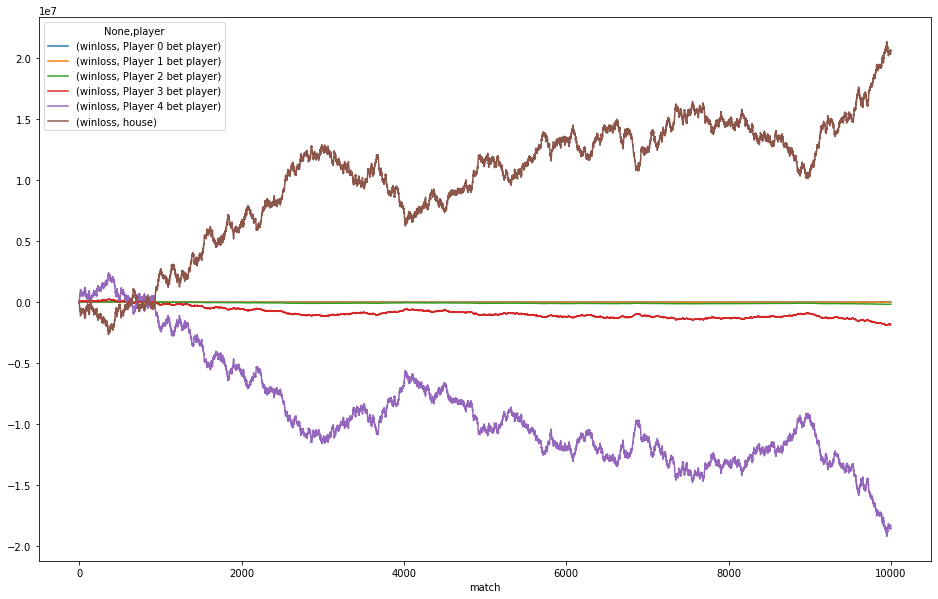

10000


result
player    0.4510
banker    0.4468
tie       0.1022
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1835.0             -18350.0            -183500.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1835000.0          -18350000.0  20388685.0  


player
Player 0 bet player       -1921.5
Player 1 bet player      -19215.0
Player 2 bet player     -192150.0
Player 3 bet player    -1921500.0
Player 4 bet player   -19215000.0
house                  -2677751.0
dtype: float64


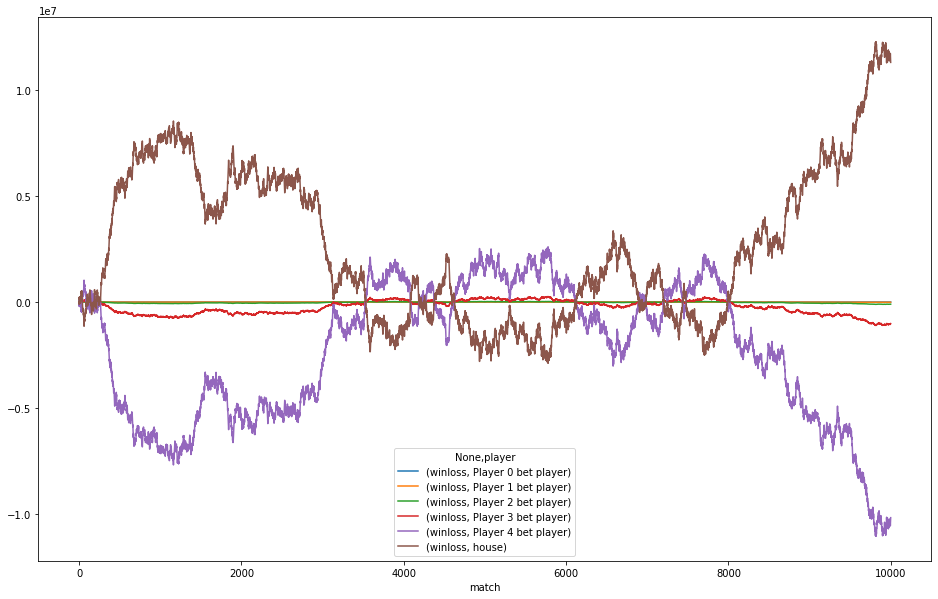

10000


result
player    0.4536
banker    0.4411
tie       0.1053
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1018.0             -10180.0            -101800.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1018000.0          -10180000.0  11310998.0  


player
Player 0 bet player       -1105.0
Player 1 bet player      -11050.0
Player 2 bet player     -110500.0
Player 3 bet player    -1105000.0
Player 4 bet player   -11050000.0
house                  -2894415.5
dtype: float64


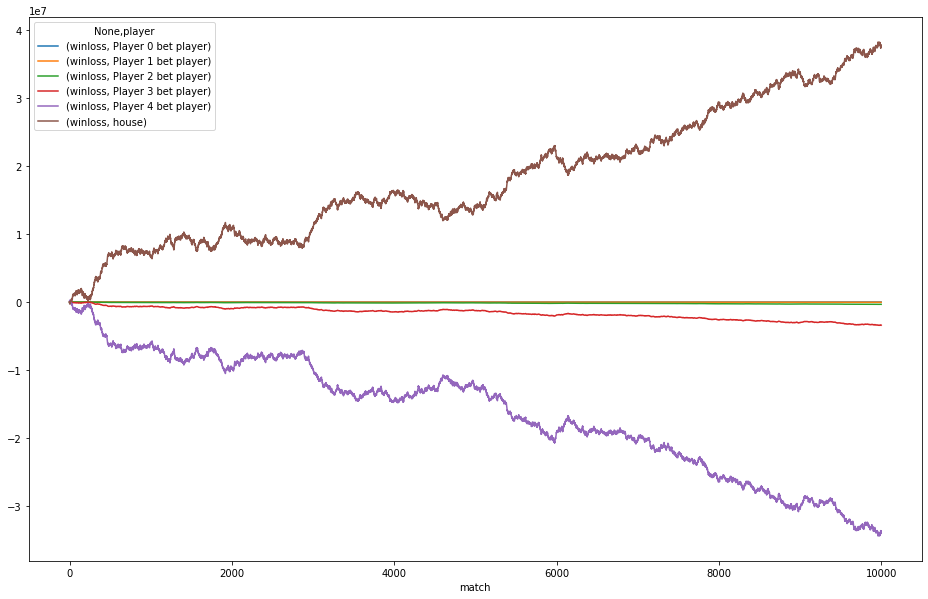

10000


result
banker    0.4570
player    0.4452
tie       0.0978
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -3406.0             -34060.0            -340600.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -3406000.0          -34060000.0  37844066.0  


player
Player 0 bet player       -3446.0
Player 1 bet player      -34460.0
Player 2 bet player     -344600.0
Player 3 bet player    -3446000.0
Player 4 bet player   -34460000.0
house                   -311108.0
dtype: float64


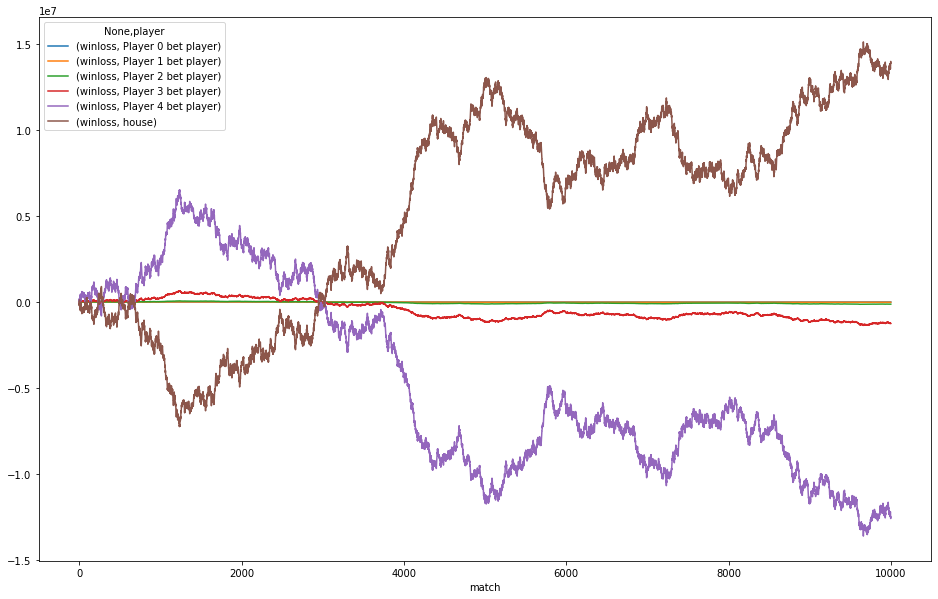

10000


result
player    0.4538
banker    0.4436
tie       0.1026
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -1249.0             -12490.0            -124900.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -1249000.0          -12490000.0  13877639.0  


player
Player 0 bet player       -1360.5
Player 1 bet player      -13605.0
Player 2 bet player     -136050.0
Player 3 bet player    -1360500.0
Player 4 bet player   -13605000.0
house                  -7238816.5
dtype: float64


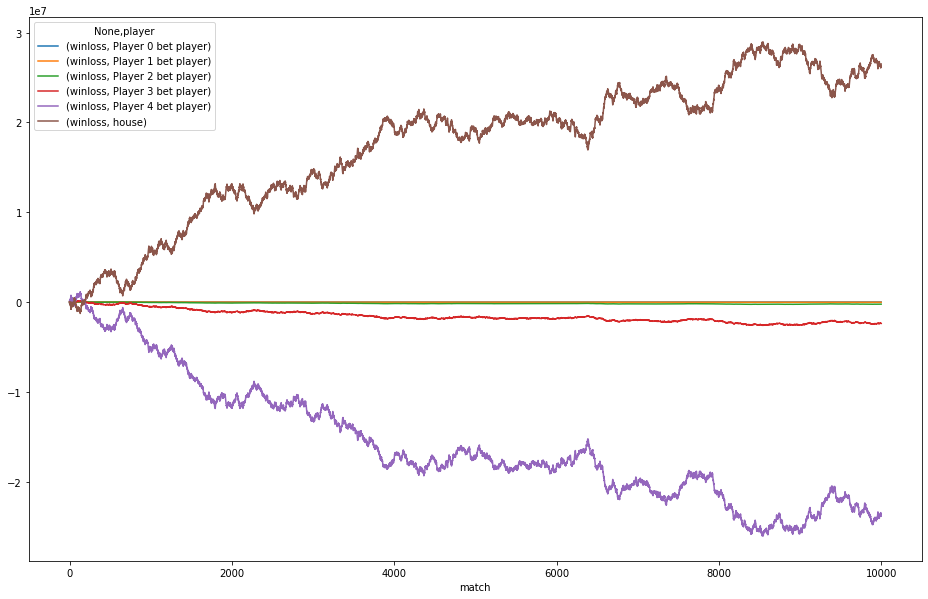

10000


result
banker    0.4524
player    0.4511
tie       0.0965
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2385.5             -23855.0            -238550.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2385500.0          -23855000.0  26505290.5  


player
Player 0 bet player       -2606.5
Player 1 bet player      -26065.0
Player 2 bet player     -260650.0
Player 3 bet player    -2606500.0
Player 4 bet player   -26065000.0
house                  -1277765.0
dtype: float64


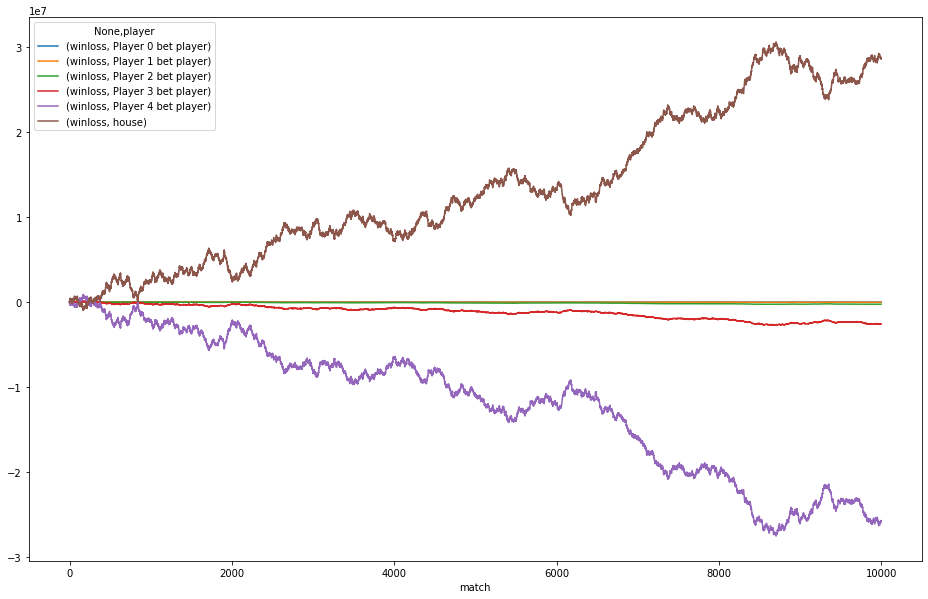

10000


result
banker    0.4523
player    0.4489
tie       0.0988
dtype: float64


player  Player 0 bet player  Player 1 bet player  Player 2 bet player  \
match                                                                   
9999                -2584.5             -25845.0            -258450.0   

player  Player 3 bet player  Player 4 bet player       house  
match                                                         
9999             -2584500.0          -25845000.0  28716379.5  


player
Player 0 bet player       -2758.5
Player 1 bet player      -27585.0
Player 2 bet player     -275850.0
Player 3 bet player    -2758500.0
Player 4 bet player   -27585000.0
house                   -994434.5
dtype: float64


In [5]:
# Test case 3
# * define many players and their bet hand and amount
# * each player's bet amount is different in order to show their relationship
# Conclusion
num_test = 10
num_matches = 10000
bets = [
    {'bet': BET_PLAYER, 'amount': 10},
    {'bet': BET_PLAYER, 'amount': 100},
    {'bet': BET_PLAYER, 'amount': 1000},
    {'bet': BET_PLAYER, 'amount': 10000},
    {'bet': BET_PLAYER, 'amount': 100000},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 3 - Different player different bet amount comparison:</h1>'))
for imatch, num_matches in enumerate(test_matches):
    display(HTML('<h2>Match [{0}]:</h2>'.format(imatch)))
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    for i in range(num_matches):
        result = baccarat.deal()
        baccarat.conclude(result)
    bet_record_df = baccarat.df()
    show_result(bet_record_df)


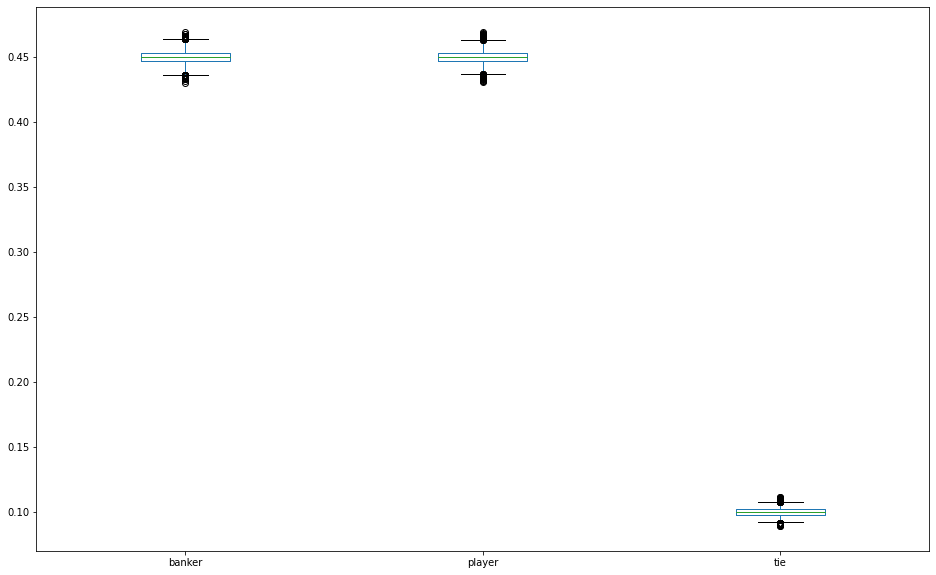

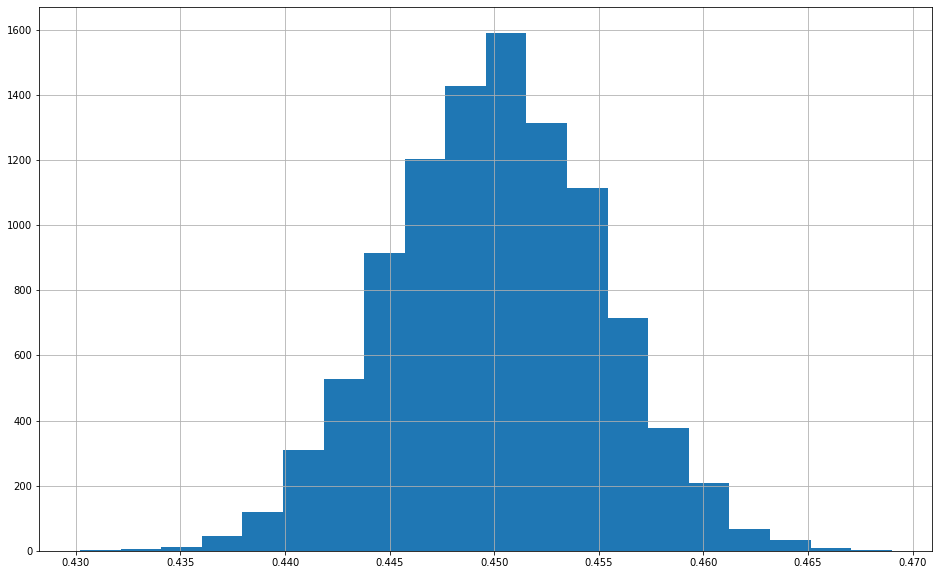

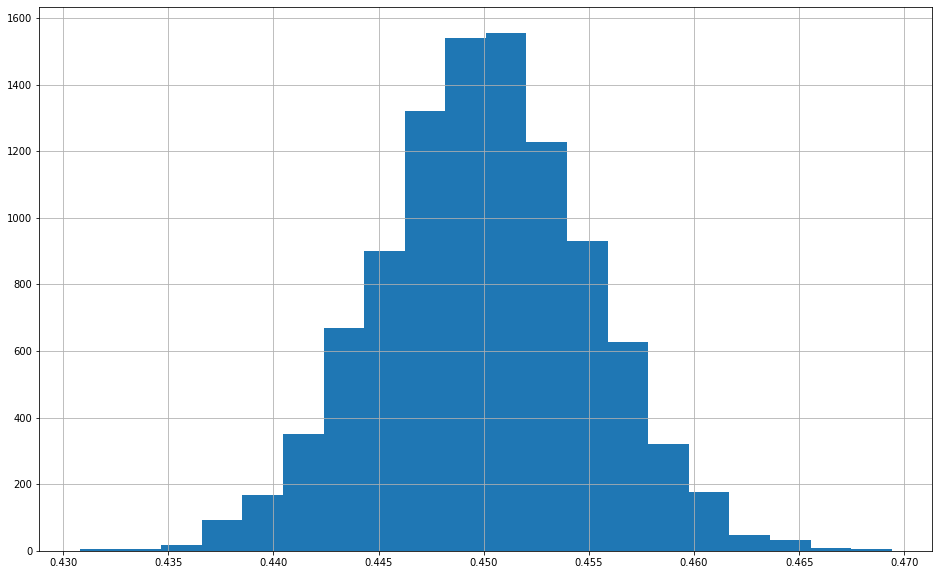

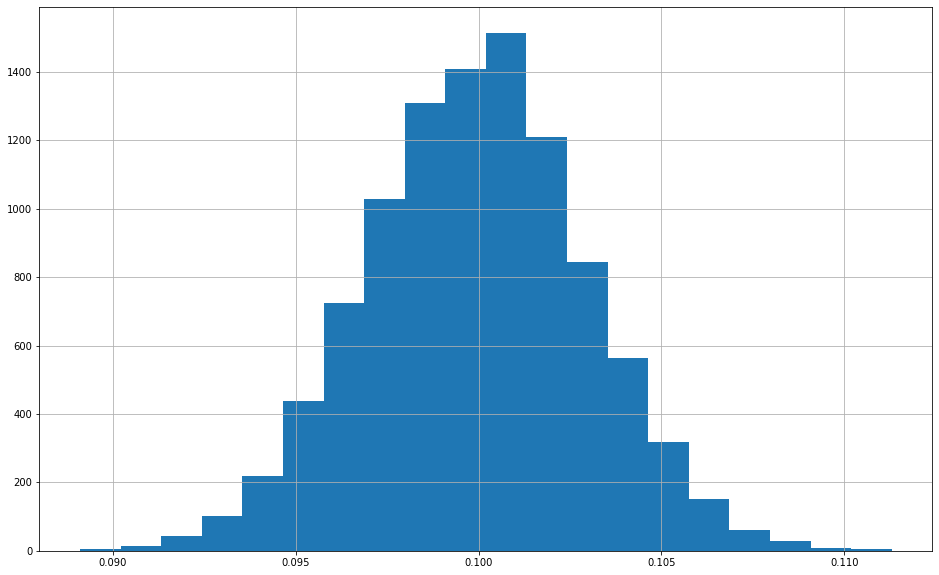

             banker        player           tie
count  10000.000000  10000.000000  10000.000000
mean       0.450076      0.450006      0.099917
std        0.004964      0.005001      0.002996
min        0.430200      0.430800      0.089100
25%        0.446700      0.446800      0.097900
50%        0.450100      0.450000      0.099900
75%        0.453500      0.453400      0.101900
max        0.469000      0.469400      0.111300


In [6]:
# Test case 4
# * test the error rate with defined sample size
num_test = 10 * 1000
num_matches = 10 * 1000
bets = [
    {'bet': BET_BANKER, 'amount': 10},
    {'bet': BET_PLAYER, 'amount': 10},
]
# test cases of number of matches to play
test_matches = [num_matches for _ in range(num_test)]

display(HTML('<h1>Test 4 - Sample size variation:</h1>'))
display(HTML('<p>Number of test: {0}</p>'.format(num_test)))
display(HTML('<p>Samples size: {0}</p>'.format(num_matches)))
results_df = pd.DataFrame()
for imatch, num_matches in enumerate(test_matches):
    player = {i: Player("Player {0} bet {1}".format(i, bet['bet']), initial_balance) for i, bet in enumerate(bets)}
    baccarat = Baccarat(player, probability_banker, probability_player, probability_tie)
    for i, bet in enumerate(bets):
        player[i].place_bet(bet['bet'], bet['amount'])
    results = []
    for i in range(num_matches):
        result = baccarat.deal()
        results.append(result)
    result_df = pd.DataFrame(data=results, columns=['result'])
    result_value_counts = result_df['result'].value_counts(normalize=True)
    results_df = results_df.append(result_value_counts, ignore_index=True)
results_df.plot.box(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.show()
results_df[BET_BANKER].hist(figsize=(FIG_WIDTH, FIG_HEIGHT), bins=20)
plt.show()
results_df[BET_PLAYER].hist(figsize=(FIG_WIDTH, FIG_HEIGHT), bins=20)
plt.show()
results_df[BET_TIE].hist(figsize=(FIG_WIDTH, FIG_HEIGHT), bins=20)
plt.show()
print(results_df.describe())


In [7]:
display(HTML('<h1>All tests finished.</h1>'))
